<a href="https://colab.research.google.com/github/WHARN0/Pembelajaran-Mesin/blob/main/Tugas_Jobsheet_11_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas
1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

2. Buatlah model CNN untuk klasifikasi dataset MNIST.

## Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load dan preprocessing data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


In [2]:
# Data augmentation untuk mengurangi overfitting
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Membuat model dengan arsitektur yang lebih dalam
model = models.Sequential([
    # Data augmentation layer
    layers.Input(shape=(32, 32, 3)),
    data_augmentation,

    # Block 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Fully Connected layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Train model
history = model.fit(
    train_images,
    train_labels,
    epochs=50,
    batch_size=64,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

Epoch 1/50
782/782 [==============================] - 54s 66ms/step - loss: 1.7739 - accuracy: 0.4047 - val_loss: 1.6284 - val_accuracy: 0.4480
Epoch 2/50
782/782 [==============================] - 52s 66ms/step - loss: 1.2835 - accuracy: 0.5421 - val_loss: 1.1795 - val_accuracy: 0.5952
Epoch 3/50
782/782 [==============================] - 52s 66ms/step - loss: 1.1152 - accuracy: 0.6025 - val_loss: 1.1123 - val_accuracy: 0.6151
Epoch 4/50
782/782 [==============================] - 52s 67ms/step - loss: 1.0180 - accuracy: 0.6420 - val_loss: 0.8987 - val_accuracy: 0.6879
Epoch 5/50
782/782 [==============================] - 54s 69ms/step - loss: 0.9433 - accuracy: 0.6705 - val_loss: 0.8962 - val_accuracy: 0.6959
Epoch 6/50
782/782 [==============================] - 55s 71ms/step - loss: 0.8862 - accuracy: 0.6879 - val_loss: 1.1542 - val_accuracy: 0.6204
Epoch 7/50
782/782 [==============================] - 55s 71ms/step - loss: 0.8402 - accuracy: 0.7064 - val_loss: 0.9066 - val_accuracy:

313/313 - 3s - loss: 0.4800 - accuracy: 0.8395 - 3s/epoch - 11ms/step

Test accuracy: 0.8395


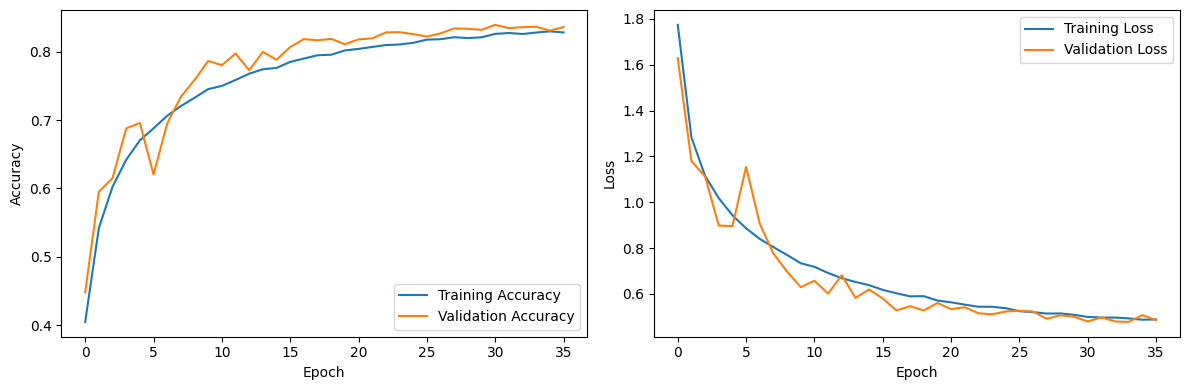

In [3]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Buatlah model CNN untuk klasifikasi dataset MNIST.

In [4]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
from keras.utils import to_categorical

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1),
          padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 26, 26, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [8]:
history=model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.3239 - accuracy: 0.9039 - val_loss: 0.1007 - val_accuracy: 0.9700
Epoch 2/20
469/469 [==============================] - 4s 10ms/step - loss: 0.1290 - accuracy: 0.9615 - val_loss: 0.0656 - val_accuracy: 0.9791
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0939 - accuracy: 0.9714 - val_loss: 0.0586 - val_accuracy: 0.9812
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0754 - accuracy: 0.9765 - val_loss: 0.0539 - val_accuracy: 0.9833
Epoch 5/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0649 - accuracy: 0.9797 - val_loss: 0.0521 - val_accuracy: 0.9826
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0565 - accuracy: 0.9818 - val_loss: 0.0523 - val_accuracy: 0.9828
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0474 - accuracy: 0.9847 - val_loss: 0.0470 - val_accuracy: 0.9853


In [9]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

313/313 - 1s - loss: 0.0573 - accuracy: 0.9863 - 788ms/epoch - 3ms/step

Test accuracy: 0.99


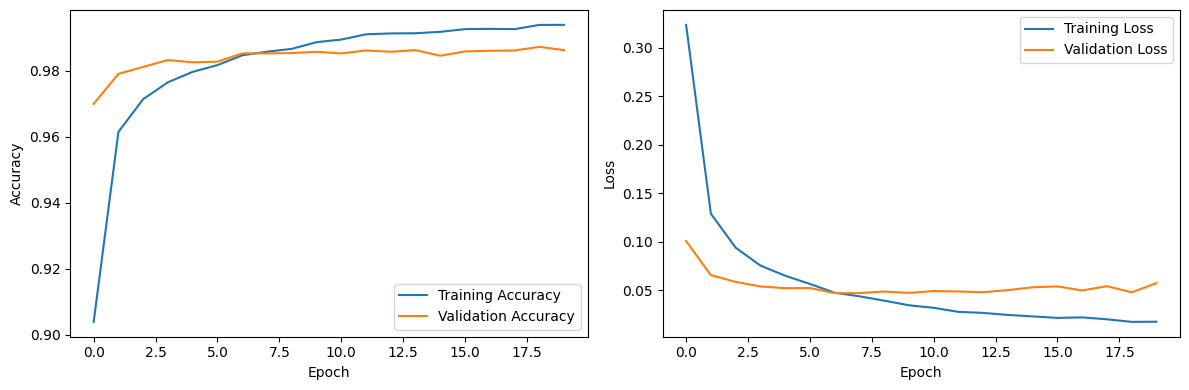

In [10]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()